<a href="https://colab.research.google.com/github/tawaqalt/arbritrary/blob/master/Tawakalitu_Yusuf_TensorFlow_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Problem 1] Looking back on scratch

1. I had to initialize my init/created a class
2. I need to initilaize weights
3. I Implemented an epoch loop allows the model to iterate over the entire
  dataset multiple times during training.
4. I have to initilaze my forward and backward propagation
5. I need to write codes for my activation function, initializer and optimizers




In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Preparing the dataset

In [2]:
#Loading the data
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# [Problem 2] Consider the correspondence between scratch and TensorFlow

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load dataset
df = pd.read_csv("Iris.csv")

# Condition extraction from data frame
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# Convert to NumPy array
X = np.array(X, dtype=np.float32)
y = np.array(y)
# Convert labels to numbers
y = np.where(y == "Iris-versicolor", 0, 1)
y = y.astype(np.float32)[:, np.newaxis]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Further split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

class GetMiniBatch:
    def __init__(self, X, y, batch_size=10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(int)

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item * self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

# Hyperparameter settings
learning_rate = 0.001
batch_size = 10
num_epochs = 100

n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

# Train mini batch iterator
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

# Define the model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(n_hidden1, activation='relu', input_shape=(n_input,)),
    tf.keras.layers.Dense(n_hidden2, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training loop
for epoch in range(num_epochs):
    total_loss = 0
    total_acc = 0
    total_batch = 0
    for mini_batch_x, mini_batch_y in get_mini_batch_train:
        loss, acc = model.train_on_batch(mini_batch_x, mini_batch_y)
        total_loss += loss
        total_acc += acc
        total_batch += 1

    total_loss /= total_batch
    total_acc /= total_batch

    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"Epoch {epoch}, loss: {total_loss:.4f}, val_loss: {val_loss:.4f}, acc: {total_acc:.3f}, val_acc: {val_acc:.3f}")

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"test_acc: {test_acc:.3f}")

Epoch 0, loss: 0.7935, val_loss: 0.6748, acc: 0.557, val_acc: 0.375
Epoch 1, loss: 0.6701, val_loss: 0.7807, acc: 0.550, val_acc: 0.375
Epoch 2, loss: 0.6681, val_loss: 0.7428, acc: 0.550, val_acc: 0.375
Epoch 3, loss: 0.6412, val_loss: 0.6786, acc: 0.550, val_acc: 0.375
Epoch 4, loss: 0.6329, val_loss: 0.6559, acc: 0.550, val_acc: 0.438
Epoch 5, loss: 0.6290, val_loss: 0.6590, acc: 0.579, val_acc: 0.375
Epoch 6, loss: 0.6214, val_loss: 0.6672, acc: 0.564, val_acc: 0.375
Epoch 7, loss: 0.6141, val_loss: 0.6630, acc: 0.550, val_acc: 0.375
Epoch 8, loss: 0.6058, val_loss: 0.6492, acc: 0.550, val_acc: 0.375
Epoch 9, loss: 0.5973, val_loss: 0.6351, acc: 0.579, val_acc: 0.500
Epoch 10, loss: 0.5857, val_loss: 0.6197, acc: 0.664, val_acc: 0.562
Epoch 11, loss: 0.5721, val_loss: 0.6070, acc: 0.729, val_acc: 0.688
Epoch 12, loss: 0.5602, val_loss: 0.5965, acc: 0.757, val_acc: 0.750
Epoch 13, loss: 0.5486, val_loss: 0.5852, acc: 0.771, val_acc: 0.750
Epoch 14, loss: 0.5370, val_loss: 0.5727, ac

Import Libraries
# New Section

# Load and Preprocess the Data

In [8]:
# Separate features and target variable
X = data.drop('Species', axis=1)
y = data['Species']

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the TensorFlow Model

In [9]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output classes for the species
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class
              metrics=['accuracy'])

# Train the Model

In [10]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 1.2809 - accuracy: 0.2500 - val_loss: 1.1260 - val_accuracy: 0.2083
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 1.1916 - accuracy: 0.2292 - val_loss: 1.0410 - val_accuracy: 0.4167
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 1.1166 - accuracy: 0.3125 - val_loss: 0.9781 - val_accuracy: 0.5833
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 1.0576 - accuracy: 0.3125 - val_loss: 0.9186 - val_accuracy: 0.5417
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 1.0045 - accuracy: 0.3229 - val_loss: 0.8667 - val_accuracy: 0.4583
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9613 - accuracy: 0.3333 - val_loss: 0.8192 - val_accuracy: 0.5000
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.9227 - accuracy: 0.3125 - val_loss: 0.7719 - val_accuracy: 0.5000
Epoch 8/100


# Evaluate the Model

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 25ms/step - loss: 0.0081 - accuracy: 1.0000
Test Loss: 0.0081, Test Accuracy: 1.0000


Summary of Changes for Multi-Class Classification

In the provided TensorFlow code, the key changes made to adapt the model for multi-class classification are:

Loss Function: Instead of using sigmoid_cross_entropy_with_logits, we use categorical_crossentropy, which is suitable for multi-class problems.
Output Layer Activation: The output layer uses the softmax activation function, which is appropriate for multi-class classification as it outputs probabilities for each class.

Correct Prediction Calculation: The method for calculating correct predictions is simplified, as TensorFlow handles this internally when using categorical_crossentropy.

# Problem 4] Create a model of House Price

In [12]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load dataset
df = pd.read_csv("train.csv")

# Condition extraction from data frame
X1 = df[['GrLivArea', 'YearBuilt']]
y1 = df['SalePrice']


# Convert to NumPy array
X1 = np.array(X, dtype=np.float32)
y1 = np.array(y)
# Convert labels to numbers
y1 = np.where(y == "Iris-versicolor", 0, 1)
y1 = y1.astype(np.float32)[:, np.newaxis]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
# Further split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

class GetMiniBatch:
    def __init__(self, X, y, batch_size=10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(int)

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item * self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

# Hyperparameter settings
learning_rate = 0.001
batch_size = 10
num_epochs = 100

n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

# Train mini batch iterator
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

# Define the model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(n_hidden1, activation='relu', input_shape=(n_input,)),
    tf.keras.layers.Dense(n_hidden2, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training loop
for epoch in range(num_epochs):
    total_loss = 0
    total_acc = 0
    total_batch = 0
    for mini_batch_x, mini_batch_y in get_mini_batch_train:
        loss, acc = model.train_on_batch(mini_batch_x, mini_batch_y)
        total_loss += loss
        total_acc += acc
        total_batch += 1

    total_loss /= total_batch
    total_acc /= total_batch

    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"Epoch {epoch}, loss: {total_loss:.4f}, val_loss: {val_loss:.4f}, acc: {total_acc:.3f}, val_acc: {val_acc:.3f}")

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"test_acc: {test_acc:.3f}")

Epoch 0, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 1, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 2, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 3, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 4, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 5, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 6, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 7, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 8, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 9, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 10, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 11, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 12, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 13, loss: 0.0000, val_loss: 0.0000, acc: 1.000, val_acc: 1.000
Epoch 14, loss: 0.0000, val_loss: 0.0000, ac

In [15]:
# Select the relevant features
X = df[['GrLivArea', 'YearBuilt']]
y = df['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input shape matches features
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])


In [26]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
30/30 [==============================] - 1s 8ms/step - loss: 39146835968.0000 - mae: 181526.1094 - val_loss: 37841829888.0000 - val_mae: 181101.2344
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 39146315776.0000 - mae: 181524.6875 - val_loss: 37841121280.0000 - val_mae: 181099.2969
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 39145271296.0000 - mae: 181521.8906 - val_loss: 37839654912.0000 - val_mae: 181095.3125
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 39143194624.0000 - mae: 181516.3125 - val_loss: 37836881920.0000 - val_mae: 181087.9375
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 39139516416.0000 - mae: 181506.5156 - val_loss: 37832220672.0000 - val_mae: 181075.6250
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 39133597696.0000 - mae: 181491.0625 - val_loss: 37825077248.0000 - val_mae: 181057.0469
Epoch 7/100
30/30 [===============

In [27]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: ${mae:.2f}')

10/10 [==============================] - 0s 2ms/step - loss: 6237647872.0000 - mae: 63507.8750
Test Mean Absolute Error: $63507.88


# Key Differences Between Classification and Regression

Target Variable: In classification, the target variable is categorical (e.g., species of iris), while in regression, the target variable is continuous (e.g., house price).

Output Layer: For classification, the output layer uses a softmax activation to produce probabilities for each class. For regression, the output layer has no activation or uses a linear activation to produce a continuous value.
Loss Function: Classification models typically use categorical cross-entropy loss, while regression models use mean squared error (MSE) or mean absolute error (MAE).

Evaluation Metrics: Classification models are evaluated using accuracy, precision, recall, and F1-score. Regression models are evaluated using metrics like MSE, MAE, or R-squared.

# Problem 5

In [17]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [18]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the images to add a channel dimension (28, 28, 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [19]:
# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Flatten the input
    layers.Dense(128, activation='relu'),     # Hidden layer with ReLU activation
    layers.Dense(10, activation='softmax')    # Output layer with softmax activation for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])

In [20]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2924 - accuracy: 0.9162 - val_loss: 0.1659 - val_accuracy: 0.9523
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1327 - accuracy: 0.9607 - val_loss: 0.1143 - val_accuracy: 0.9678
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0915 - accuracy: 0.9731 - val_loss: 0.1075 - val_accuracy: 0.9687
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0681 - accuracy: 0.9799 - val_loss: 0.0892 - val_accuracy: 0.9737
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0526 - accuracy: 0.9841 - val_loss: 0.1001 - val_accuracy: 0.9706


In [21]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0848 - accuracy: 0.9736
Test accuracy: 0.9736


313/313 [==============================] - 1s 2ms/step


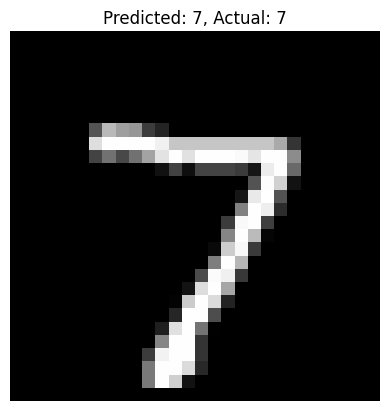

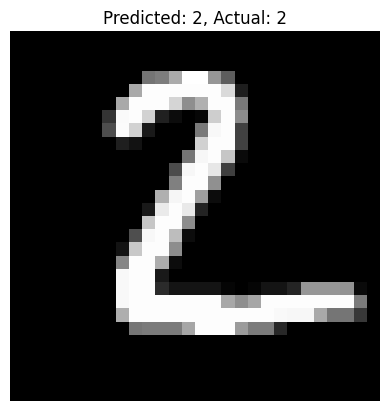

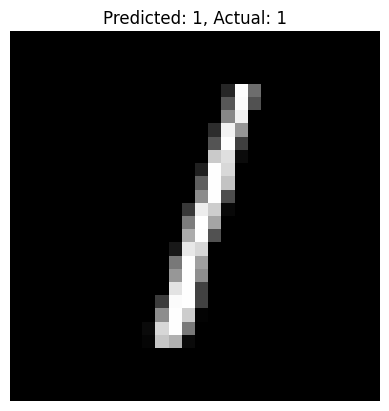

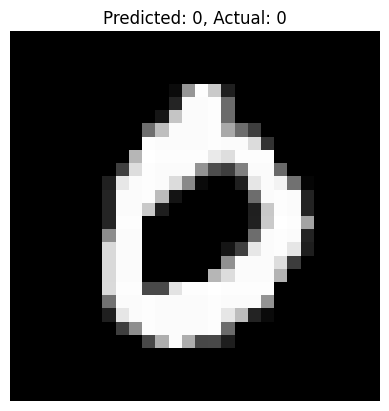

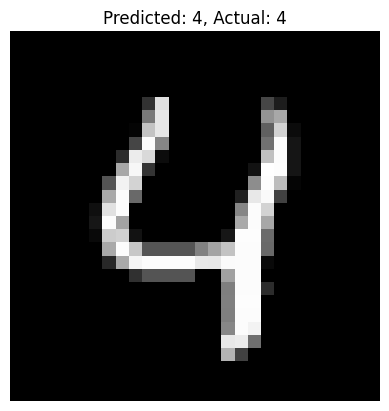

In [22]:
# Make predictions
predictions = model.predict(test_images)

# Display the first 5 test images and their predicted labels
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}, Actual: {test_labels[i]}')
    plt.axis('off')
    plt.show()